# Q-function Approximation 

$ Q^h$ ~ $Q^*$ <br>
$J(w_i) = E_{\pi} [(r + \gamma max_{a'} Q^h(s',a';w_i^h) - Q(s,a;w_i))^2]$

# Inspiration 

실제 세상에서의 State의 가능한 집합은 거의 무한(Infinite)이다. 이전에 하던 Table에 q-value를 저장하는 방식은 불가능하다...

# Flozen Lake with Q-Network 

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from IPython.display import clear_output
%matplotlib inline

### one-hot encoding 

state : np.identity(16)[s1:s1+1] # 4x4 의 world라서

In [2]:
print(np.identity(16)[0:1]) # identity는 단위행렬

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [3]:
def one_hot(x):
    return np.identity(16)[x:x+1]

In [4]:
env = gym.make('FrozenLake-v0')

[2017-02-24 10:39:10,614] Making new env: FrozenLake-v0


In [5]:
num_episodes = 2000
dis = .99
learning_rate = 0.1
rList = [] # create lists to contain total rewards and steps per episode
EGREEDY = True # True if e-greedy , False if add random_noise

In [6]:
input_size = env.observation_space.n # 16
output_size = env.action_space.n # 4

### Simple Q-network  (not hidden layer)

In [7]:
X = tf.placeholder(shape=[1,input_size],dtype=tf.float32)
Y = tf.placeholder(shape=[1,output_size],dtype=tf.float32)

W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01))
Qpred = tf.matmul(X,W)

In [8]:
loss = tf.reduce_sum(tf.square(Y-Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# Q-learning with Q-network 

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i_episode in range(num_episodes):
        
        if i_episode % 100 == 0:
            print(i_episode)
        s = env.reset()
        rAll = 0 # 모든 리워드?
        done = False
        local_loss = []
        e = 1. / ((i_episode//50)+10) # 엡실론 디케이 

        while not done: # 한판 끝날 때 까지 해봐서 Q-value를 업데이트를 해나간다

            Qs = sess.run(Qpred,feed_dict={X:one_hot(s)})

            if EGREEDY:
                    # e-greedy
                    if np.random.rand(1) < e:
                        a = env.action_space.sample()
                    else:
                        a = np.argmax(Qs)
            else:
                    # add random_noise
                a =np.argmax(Q[state] + np.random.rand(1,env.action_space.n)/(i_episode+1))

            s1, reward, done, _ = env.step(a)

            if done:
                Qs[0,a] = reward  # Qs는 (1,4) 의 타겟 벡터 형태 (1차원 행렬)
            else:
                Qs1 = sess.run(Qpred, feed_dict={X:one_hot(s1)})
                Qs[0,a] = reward + dis*np.max(Qs1) # greedy한 타겟 

            sess.run(train, feed_dict={X: one_hot(s),Y:Qs}) # Q-network 트레이닝

            rAll += reward
            s = s1
        rList.append(rAll)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [10]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")

Success rate: 0.574
Final Q-Table Values
LEFT DOWN RIGHT UP


In [11]:
len(rList)

2000

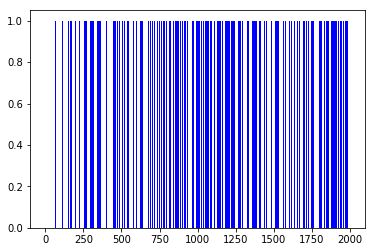

In [16]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

여전히 Table 방식과 크게 다르지 않다. 당연히 